In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import functions_niamh as func
from scipy.stats import lognorm
from scipy.stats import norm
mpl.rcParams['agg.path.chunksize'] = 100000
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size': 20})
rc('text', usetex=True)

In [2]:
# Need to specify these values - can't read from command lins
#file   = '../OBS_MODELS/GGF/ggf100k_tllxyz3_spike_the_alldt_lr=90_type=3_ns=0001' '-77.5' '82.5' '20' '1'
infile = 'ggf100k_tllxyz3_spike_the_alldt_lr=90_type=3_ns=0001'

tl = -77.5
tu = 82.5
ti = 20
var= 1
ntl= np.float(tl)
ntu= np.float(tu)

In [3]:
# Read an initial file that contains just one latitude. 
# This is to figure out how long each of the arrays needs to be (see definitions of n and l below)
file   = infile + "_lat=" + str(tl)
lat0, lon0, dtdt0, dvgpdt0, dvdmdt0, dfdt0  = np.loadtxt(file, usecols=(0,1,2,3,4,5), skiprows=1, unpack='true')

In [2]:
# Read in file containing all latitudes
#file   = "../OBS_MODELS/GGF/ggf100k_tllxyz3_spike_the_alldt_lr=90_type=3_ns=0001"
#file    = '../OBS_MODELS/LSMOD/LSMOD.2_tllxyz3_spike_the_alldt_lr=90_type=3_ns=0001'
file    = '../OBS_MODELS/CALS10K/cals10k.2_tllxyz2_spike_the_alldt_lr=90_type=3_ns=0001'
lat_all, lon_all, dtdt_all, dvgpdt_all, dvdmdt_all, dfdt_all  = np.loadtxt(file, usecols=(0,1,2,3,4,5), skiprows=1, unpack='true')

OSError: ../OBS_MODELS/CALS10K/cals10k.2_tllxyz2_spike_the_alldt_lr=90_type=3_ns=0001 not found.

In [ ]:
# CD - I don't think this works!
#stats = 0
array = dtdt_all[dtdt_all>0]
pts = np.sort(array)
#array = dvgpdt0[dvgpdt0>0]
#stats = lognorm.fit(array)  # Should return shape, location and scale
#print('shape = ', stats[0], ' loc  = ', stats[1], 'mean = ', stats[2])
    
# CD - But this one does. 
muX       = np.mean(np.log(array))
sigmaX    = np.std(np.log(array)) 

print(np.max(pts))
print('mean =', np.exp(muX), ' sigma = ', sigmaX)
theory     = lognorm(sigmaX, scale=np.exp(muX), loc=0)
theory_cdf = theory.cdf(pts)
theory_pdf = theory.pdf(pts)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
#ax.set_xlim([])

n, bins, patches = ax1.hist(pts, bins=500, log=False, density=True, histtype='step', cumulative=True)
index = np.argmax(n>=0.99)
cdfbin = bins[index]
print(cdfbin)
ax1.plot(pts, theory_cdf, label="Theory")
ax1.set_xlim([0.0,0.2])
ax1.set_xlabel("Rate of change")
ax1.set_ylabel("cdf")

print(len(n), len(pts))
cdfindex  = np.argmax(theory_cdf >= 0.99)
P99value = np.interp(0.99, n, pts)
print(theory_cdf[cdfindex])
#P99index = cdfindex
#P99value = pts[P99index]
print('99th percentile        = ',P99value)
print('max of theoretical cdf = ', theory_cdf[-1])
print('max of empirical   cdf = ', n[-1])

n, bins, patches = ax2.hist(pts, bins=500, log=True , density=True, histtype='step', cumulative=False)
#ax2.plot(pts, theory_pdf, label="Theory")
ax2.set_ylim([1e-5,1e2])
ax2.set_xlabel("Rate of change")
ax2.set_ylabel("pdf")

plt.show()

In [ ]:
l  = len(lat0)

n  = int(np.ceil(ntu - ntl) / np.abs(ti)+1)
adtdt  = np.zeros([int(n),l])
advgpdt= np.zeros([int(n),l])
advdmdt= np.zeros([int(n),l]) 
adfdt  = np.zeros([int(n),l])
name   = np.zeros([int(n)])

# Start of functions
## Allows for the creation of distribution graphs
##### Start by defining the variables in the model, the upper and latitides are to stay constant to allow for a clearer comparison, then separate the latitudes into files of increment of 20 degrees (determined in the first function), finally plot the figures.

In [ ]:
## Assign columns to each of the 4 variables in the latitude files

In [8]:
# number of lines
ggf_ln = 5181409
lsmod_ln = 1039393
cals_ln = 233281

## Rate of change of magnetic field, B-hat

36
theta =  -77.5  mean = 0.006393428072969869  sigma =  0.7226561883540593
0.059283254
cdf =  0.9989711125724141
theta =  -72.5  mean = 0.006595009676987035  sigma =  0.728550279112578
0.067045503
cdf =  0.9992714977504684
theta =  -67.5  mean = 0.006862011576839315  sigma =  0.7332445197679872
0.074816121
cdf =  0.9994393270910513
theta =  -62.5  mean = 0.007178468531450487  sigma =  0.7417084748130486
0.081374897
cdf =  0.9994688731784203
theta =  -57.5  mean = 0.007546012709855592  sigma =  0.753290050856222
0.086702582
cdf =  0.9994045863510054
theta =  -52.5  mean = 0.007981750461351767  sigma =  0.765577478895137
0.1011802
cdf =  0.9995457423651856
theta =  -47.5  mean = 0.008511843230383245  sigma =  0.7697023266498008
0.12588829
cdf =  0.9997673462803712
theta =  -42.5  mean = 0.009136981759035663  sigma =  0.7705509977883473
0.15456827
cdf =  0.9998789607391858
theta =  -37.5  mean = 0.009866655326807175  sigma =  0.7673614032629712
0.18467206
cdf =  0.9999326011988935
theta 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 432x288 with 0 Axes>

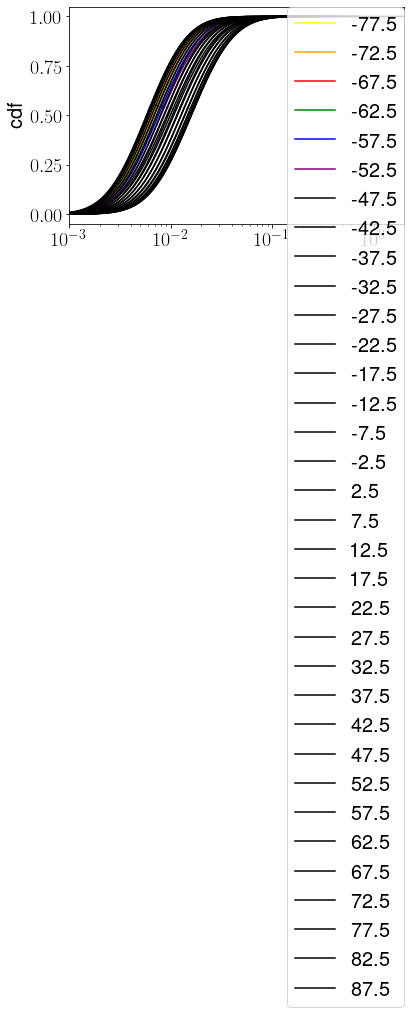

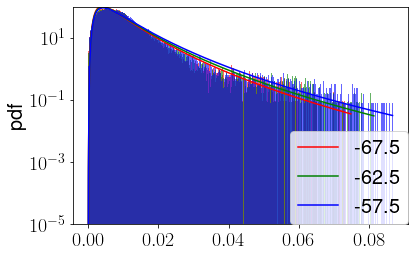

In [10]:
#Run code for GGF model
tl, tu, ti, var, ntl, ntu = func.define_parameters_all(1)

#muX, sigmaX = mean('../OBS_MODELS/GGF/ggf100k_tllxyz3_spike_the_alldt_lr=90_type=3_ns=0001')
name,alat,alon,adtdt,advgpdt,advdmdt,adfdt,atime,n  = func.separate_latitudes_all('ggf100k_tllxyz3_spike_the_alldt_lr=90_type=3_ns=0001', tl, tu, ti, var, ntl, ntu,ggf_ln)
fig1, fig2, GGFmuX1, GGFmax1, GGFsigma1 = func.plot_figures(adtdt,advgpdt,advdmdt,adfdt,var,n,name)
GGF1_no_excursion = func.no_excursionGGF(atime,adtdt,advgpdt,advdmdt,adfdt,var,n, name)

In [ ]:
#Run code for LSMOD.2 model
tl, tu, ti, var, ntl, ntu = func.define_parameters_all(1)
name,alat,alon,adtdt,advgpdt,advdmdt,adfdt,atime,n = func.separate_latitudes_all('LSMOD.2_tllxyz3_spike_the_alldt_lr=90_type=3_ns=0001',tl, tu, ti, var, ntl, ntu, lsmod_ln)
fig1, fig2, LSMODmuX1, LSMODmax1, LSMODsigma1  = func.plot_figures(adtdt,advgpdt,advdmdt,adfdt,var,n,name)


In [ ]:
#Run code for CALS model
tl, tu, ti, var, ntl, ntu = func.define_parameters_all(1)

#muX, sigmaX = mean('../OBS_MODELS/CALS10K/cals10k.2_tllxyz2_spike_the_alldt_lr=90_type=3_ns=0001')
name,alat,alon,adtdt,advgpdt,advdmdt,adfdt,atime,n = func.separate_latitudes_all('cals10k.2_tllxyz2_spike_the_alldt_lr=90_type=3_ns=0001',tl, tu, ti, var, ntl, ntu, cals_ln)
fig1, fig2, CALSmuX1, CALSmax1, CALSsigma1 = func.plot_figures(adtdt,advgpdt,advdmdt,adfdt,var,n,name)
#print(muX)

# Rate of change of the virtual geomagnetic pole

In [5]:
#Run code for GGF model
tl, tu, ti, var, ntl, ntu = func.define_parameters_all(2)

name,alat,alon,adtdt,advgpdt,advdmdt,adfdt,atime,n  = func.separate_latitudes_all('ggf100k_tllxyz3_spike_the_alldt_lr=90_type=3_ns=0001', tl, tu, ti, var, ntl, ntu,ggf_ln)
fig1, fig2, GGFmuX2, GGFmax2, GGFsigma2 = func.plot_figures(adtdt,advgpdt,advdmdt,adfdt,var,n,name)


0.0 ggf100k_tllxyz3_spike_the_alldt_lr=90_type=3_ns=0001_lat=0.0


OSError: ggf100k_tllxyz3_spike_the_alldt_lr=90_type=3_ns=0001_lat=0.0 not found.

In [ ]:
#Run code for LSMOD.2 model
tl, tu, ti, var, ntl, ntu = func.define_parameters_all(2)
name,alat,alon,adtdt,advgpdt,advdmdt,adfdt,atime,n = func.separate_latitudes_all('LSMOD.2_tllxyz3_spike_the_alldt_lr=90_type=3_ns=0001',tl, tu, ti, var, ntl, ntu, lsmod_ln)
fig1, fig2, LSMODmuX2, LSMODmax2, LSMODsigma2  = func.plot_figures(adtdt,advgpdt,advdmdt,adfdt,var,n,name)


In [ ]:
#Run code for CALS model
tl, tu, ti, var, ntl, ntu = func.define_parameters_all(2)

#muX, sigmaX = mean('../OBS_MODELS/CALS10K/cals10k.2_tllxyz2_spike_the_alldt_lr=90_type=3_ns=0001')
name,alat,alon,adtdt,advgpdt,advdmdt,adfdt,atime,n = func.separate_latitudes_all('cals10k.2_tllxyz2_spike_the_alldt_lr=90_type=3_ns=0001',tl, tu, ti, var, ntl, ntu, cals_ln)
fig1, fig2, CALSmuX2, CALSmax2, CALSsigma2 = func.plot_figures(adtdt,advgpdt,advdmdt,adfdt,var,n,name)
#print(muX)

# Rate of change of the virtual dipole moment

In [ ]:
#Run code for GGF model
tl, tu, ti, var, ntl, ntu = func.define_parameters_all(3)

name,alat,alon,adtdt,advgpdt,advdmdt,adfdt,atime,n  = func.separate_latitudes_all('ggf100k_tllxyz3_spike_the_alldt_lr=90_type=3_ns=0001', tl, tu, ti, var, ntl, ntu,ggf_ln)
fig1, fig2, GGFmuX3, GGFmax3, GGFsigma3 = func.plot_figures(adtdt,advgpdt,advdmdt,adfdt,var,n,name)

In [ ]:
#Run code for LSMOD.2 model
tl, tu, ti, var, ntl, ntu = func.define_parameters_all(3)
name,alat,alon,adtdt,advgpdt,advdmdt,adfdt,atime,n = func.separate_latitudes_all('LSMOD.2_tllxyz3_spike_the_alldt_lr=90_type=3_ns=0001',tl, tu, ti, var, ntl, ntu, lsmod_ln)
fig1, fig2, LSMODmuX3, LSMODmax3, LSMODsigma3  = func.plot_figures(adtdt,advgpdt,advdmdt,adfdt,var,n,name)

In [ ]:
#Run code for CALS model
tl, tu, ti, var, ntl, ntu = func.define_parameters_all(3)

#muX, sigmaX = mean('../OBS_MODELS/CALS10K/cals10k.2_tllxyz2_spike_the_alldt_lr=90_type=3_ns=0001')
name,alat,alon,adtdt,advgpdt,advdmdt,adfdt,atime,n = func.separate_latitudes_all('cals10k.2_tllxyz2_spike_the_alldt_lr=90_type=3_ns=0001',tl, tu, ti, var, ntl, ntu, cals_ln)
fig1, fig2, CALSmuX3, CALSmax3, CALSsigma3 = func.plot_figures(adtdt,advgpdt,advdmdt,adfdt,var,n,name)
#print(muX)

# Rate of Change for B

In [ ]:
#Run code for GGF model
tl, tu, ti, var, ntl, ntu = func.define_parameters_all(4)

name,alat,alon,adtdt,advgpdt,advdmdt,adfdt,atime,n  = func.separate_latitudes_all('ggf100k_tllxyz3_spike_the_alldt_lr=90_type=3_ns=0001', tl, tu, ti, var, ntl, ntu,ggf_ln)
fig1, fig2, GGFmuX4, GGFmax4, GGFsigma4 = func.plot_figures(adtdt,advgpdt,advdmdt,adfdt,var,n,name)

In [ ]:
#Run code for LSMOD.2 model
tl, tu, ti, var, ntl, ntu = func.define_parameters_all(4)
name,alat,alon,adtdt,advgpdt,advdmdt,adfdt,atime,n = func.separate_latitudes_all('LSMOD.2_tllxyz3_spike_the_alldt_lr=90_type=3_ns=0001',tl, tu, ti, var, ntl, ntu, lsmod_ln)
fig1, fig2, LSMODmuX4, LSMODmax4, LSMODsigma4  = func.plot_figures(adtdt,advgpdt,advdmdt,adfdt,var,n,name)

In [ ]:
#Run code for CALS model
tl, tu, ti, var, ntl, ntu = func.define_parameters_all(4)

#muX, sigmaX = mean('../OBS_MODELS/CALS10K/cals10k.2_tllxyz2_spike_the_alldt_lr=90_type=3_ns=0001')
name,alat,alon,adtdt,advgpdt,advdmdt,adfdt,atime,n = func.separate_latitudes_all('cals10k.2_tllxyz2_spike_the_alldt_lr=90_type=3_ns=0001',tl, tu, ti, var, ntl, ntu, cals_ln)
fig1, fig2, CALSmuX4, CALSmax4, CALSsigma4 = func.plot_figures(adtdt,advgpdt,advdmdt,adfdt,var,n,name)

print(CALSmuX4)

### PDF- COuld this be an exponential distribution?

# Means as a function of latitude

In [ ]:
# array of latitudes
lat = np.arange(-77.5,(ntu+1),ti)
label1 = "$\partial \\hat{\\mathbf{B}}/ \partial t$ ($^{\\circ}$ yr$^{-1}$)"
label2 = "$\partial \\hat{\\mathbf{P}}_V/ \partial t$ ($^{\\circ}$ yr$^{-1}$)"
label3 = "$\partial P_V/ \partial t$ ($ZAm^2$ yr$^{-1}$)"
label4 = "$\partial B/ \partial t$ (${\\mu}$T yr$^{-1}$)"
print(GGFsigma1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,15))

#Subplot 1
ax1.plot(lat, GGFmuX1, color='green', marker='x', linestyle='-')
ax1.plot(lat, LSMODmuX1, color='red', marker='x', linestyle='-')
ax1.plot(lat, CALSmuX1, color='blue', marker='x', linestyle='-')

ax1.set_xlabel('Latitude (degrees)', fontsize=16)
ax1.set_ylabel(str(label1), fontsize=16)

#Subplot 2
ax2.plot(lat, GGFmuX2, color='green', marker='x', linestyle='-')
ax2.plot(lat, LSMODmuX2, color='red', marker='x', linestyle='-')
ax2.plot(lat, CALSmuX2, color='blue', marker='x', linestyle='-')

ax2.set_xlabel('Latitude (degrees)', fontsize=16)
ax2.set_ylabel(str(label2), fontsize=16)

#Subplot 3
ax3.plot(lat, GGFmuX4, color='green', marker='x', linestyle='-')
ax3.plot(lat, LSMODmuX4, color='red', marker='x', linestyle='-')
ax3.plot(lat, CALSmuX4, color='blue', marker='x', linestyle='-')

ax3.set_xlabel('Latitude (degrees)', fontsize=16)
ax3.set_ylabel('Mean $\partial B/ \partial t$ (${\\mu}$T yr$^{-1}$)', fontsize=16)

#Subplot 4
ax4.plot(lat, GGFmuX3, color='green', marker='x', linestyle='-')
ax4.plot(lat, LSMODmuX3, color='red', marker='x', linestyle='-')
ax4.plot(lat, CALSmuX3, color='blue', marker='x', linestyle='-')

ax4.set_xlabel('Latitude (degrees)', fontsize=16)
ax4.set_ylabel('Mean $\partial P_V/ \partial t$ ($ZAm^2$ yr$^{-1}$)', fontsize=16)

ggf = mpatches.Patch(color='green', label='GGF100k')
lsmod = mpatches.Patch(color='red', label='LSMOD.2')
cals = mpatches.Patch(color='blue', label='CALS10K.2')
plt.legend(handles=[ggf,lsmod, cals], bbox_to_anchor=(1.05,1), borderaxespad=0.)


# Maximum points as a function of latitude

In [ ]:
# array of latitudes
lat = np.arange(-77.5,(ntu+1),ti)
label1 = "$\partial \\hat{\\mathbf{B}}/ \partial t$ ($^{\\circ}$ yr$^{-1}$)"
label2 = "$\partial \\hat{\\mathbf{P}}_V/ \partial t$ ($^{\\circ}$ yr$^{-1}$)"
label3 = "$\partial P_V/ \partial t$ ($ZAm^2$ yr$^{-1}$)"
label4 = "$\partial B/ \partial t$ (${\\mu}$T yr$^{-1}$)"

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,15))
fig.suptitle('Maximum as a Function of Latitude', fontsize=28)
#Subplot 1
ax1.plot(lat, GGFmax1, color='green', marker='x', linestyle='-')
ax1.plot(lat, LSMODmax1, color='red', marker='x', linestyle='-')
ax1.plot(lat, CALSmax1, color='blue', marker='x', linestyle='-')
ax1.set_title('Maximum values of ' + str(label1) + ' as a Function of Latitude')
ax1.set_xlabel('Latitude (degrees)')
ax1.set_ylabel(str(label1))

#Subplot 2
ax2.plot(lat, GGFmax2, color='green', marker='x', linestyle='-')
ax2.plot(lat, LSMODmax2, color='red', marker='x', linestyle='-')
ax2.plot(lat, CALSmax2, color='blue', marker='x', linestyle='-')
ax2.set_title('Maximum values of ' + str(label2) +  ' as a Function of Latitude')
ax2.set_xlabel('Latitude (degrees)')
ax2.set_ylabel(str(label2))

#Subplot 4
ax4.plot(lat, GGFmax3, color='green', marker='x', linestyle='-')
ax4.plot(lat, LSMODmax3, color='red', marker='x', linestyle='-')
ax4.plot(lat, CALSmax3, color='blue', marker='x', linestyle='-')
ax4.set_title('Maximum values of $\partial P_V/ \partial t$ ($ZAm^2$ yr$^{-1}$) as a Function of Latitude')
ax4.set_xlabel('Latitude (degrees)')
ax4.set_ylabel('$\partial P_V/ \partial t$ ($ZAm^2$ yr$^{-1}$)')

#Subplot 3
ax3.plot(lat, GGFmax4, color='green', marker='x', linestyle='-')
ax3.plot(lat, LSMODmax4, color='red', marker='x', linestyle='-')
ax3.plot(lat, CALSmax4, color='blue', marker='x', linestyle='-')
ax3.set_title('Maximum values of $\partial B/ \partial t$ (${\\mu}$T yr$^{-1}$) as a Function of Latitude')
ax3.set_xlabel('Latitude (degrees)')
ax3.set_ylabel('$\partial B/ \partial t$ (${\\mu}$T yr$^{-1}$)')
ggf = mpatches.Patch(color='green', label='GGF100k')
lsmod = mpatches.Patch(color='red', label='LSMOD.2')
cals = mpatches.Patch(color='blue', label='CALS10K.2')
plt.legend(handles=[ggf,lsmod, cals], bbox_to_anchor=(1.05,1), borderaxespad=0.)

In [ ]:
lat = np.arange(-77.5,(ntu+1),ti)
label1 = "$\partial \\hat{\\mathbf{B}}/ \partial t$ ($^{\\circ}$ yr$^{-1}$)"
label2 = "$\partial \\hat{\\mathbf{P}}_V/ \partial t$ ($^{\\circ}$ yr$^{-1}$)"
label3 = "$\partial P_V/ \partial t$ ($ZAm^2$ yr$^{-1}$)"
label4 = "$\partial B/ \partial t$ (${\\mu}$T yr$^{-1}$)"

fig, ax = plt.subplots()

#Subplot 1 
ax.plot(lat, GGFmax1, color='coral', marker='x', linestyle='-')
ax.set_xlabel('Latitude (degrees)')
ax.set_ylabel(str(label1))
ax2 = ax.twinx()
ax2.plot(lat, GGFmax4, color='turquoise', marker='x', linestyle='-')
ax2.set_ylabel(str(label4))
plt.show()
